In [48]:
from helpers import *
import numpy as np
import pandas as pd
import os
import pickle
from LDA_helpers import process_tweets
import re
from pre_process_text import clean
import gensim
from gensim import corpora, models

In [2]:
DATA_PATH = access_folder()
print(os.listdir(DATA_PATH))

['IRAhandle_tweets_4.csv', 'IRAhandle_tweets_5.csv', 'IRAhandle_tweets_7.csv', 'IRAhandle_tweets_6.csv', 'cleaned_tweets_by_authors.txt', 'IRAhandle_tweets_2.csv', '.DS_Store', 'IRAhandle_tweets_3.csv', 'IRAhandle_tweets_1.csv', 'line_to_author.pickle', '.gitignore', 'hashtags.txt', 'tweets_by_authors.txt', 'IRAhandle_tweets_8.csv', 'IRAhandle_tweets_9.csv']


In [3]:
# loading all data
df_s = []
for file in os.listdir(DATA_PATH):
    if file[-4:] == '.csv':
        df_s.append(pd.read_csv(DATA_PATH + file))
tweets = pd.concat(df_s)
tweets

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,1.674084e+09,GAB1ALDANA,People are too toxic. I think I have people po...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2150,RETWEET,Hashtager,0,1,HashtagGamer
1,1.674084e+09,GAB1ALDANA,#NowPlaying Don't Shoot (I'm a Man) by @DEVO -...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2146,RETWEET,Hashtager,0,1,HashtagGamer
2,1.674084e+09,GAB1ALDANA,the 'I'm the most boring person in the world' ...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2159,RETWEET,Hashtager,0,1,HashtagGamer
3,1.674084e+09,GAB1ALDANA,#MyAchillesHeel slippery floors https://t.co/R...,United States,Norwegian,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2160,RETWEET,Hashtager,0,1,HashtagGamer
4,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Boring narcissists.....nothing...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2158,RETWEET,Hashtager,0,1,HashtagGamer
5,1.674084e+09,GAB1ALDANA,Your opinion on Hillary really matters to a no...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2014,2154,RETWEET,Hashtager,0,1,HashtagGamer
6,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Lilith from Frasier. 0_O,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2156,RETWEET,Hashtager,0,1,HashtagGamer
7,1.674084e+09,GAB1ALDANA,Come find us at the national mall for the #DC ...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2157,RETWEET,Hashtager,0,1,HashtagGamer
8,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Trolling celebrities. I have...,United States,English,7/30/2016 20:17,7/30/2016 20:17,3395,2013,2161,RETWEET,Hashtager,0,1,HashtagGamer
9,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Morbid comedy �,United States,English,7/30/2016 20:17,7/30/2016 20:17,3395,2013,2167,RETWEET,Hashtager,0,1,HashtagGamer


In [4]:
# only keeping tweets in English
english_tweets = tweets.loc[tweets['language'] == 'English']
english_tweets.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,1.674084e+09,GAB1ALDANA,People are too toxic. I think I have people po...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2150,RETWEET,Hashtager,0,1,HashtagGamer
1,1.674084e+09,GAB1ALDANA,#NowPlaying Don't Shoot (I'm a Man) by @DEVO -...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2146,RETWEET,Hashtager,0,1,HashtagGamer
2,1.674084e+09,GAB1ALDANA,the 'I'm the most boring person in the world' ...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2159,RETWEET,Hashtager,0,1,HashtagGamer
4,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Boring narcissists.....nothing...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2158,RETWEET,Hashtager,0,1,HashtagGamer
5,1.674084e+09,GAB1ALDANA,Your opinion on Hillary really matters to a no...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2014,2154,RETWEET,Hashtager,0,1,HashtagGamer


In [5]:
# groupby author
txt_path = DATA_PATH + 'tweets_by_authors.txt'
author_group = english_tweets.groupby('author')
line_to_author_dictionary = dict()
index = 0
with open(txt_path, 'w') as f:
    for name, group in author_group:
        line = ''
        for content in group.content.values:
            line = line + str(content)
        f.write(line+'\n')
        line_to_author_dictionary[index] = name
        index += 1
# save dictionary to pickel file
dict_path = DATA_PATH + 'line_to_author.pickle'
save('line_to_author', line_to_author_dictionary, folder_name='data')

In [22]:
hashtag_list = []
for content in english_tweets.content.values:
    hashtags = set([re.sub(r"(\W+)$", "", j) for j in set([i for i in str(content).split() if i.startswith("#")])])
    for hashtag in hashtags:
        if hashtag not in hashtag_list:
            hashtag_list.append(hashtag)

In [24]:
hashtag_path = DATA_PATH + 'hashtags.txt'
with open(hashtag_path, 'w') as f:
    for line in hashtag_list:
        f.write(line+'\n')

In [3]:
txt_path = DATA_PATH + 'tweets_by_authors.txt'
cleaned_txt_path = DATA_PATH + 'cleaned_tweets_by_authors.txt'
f = open(txt_path)
with open(cleaned_txt_path, 'w') as c_f:
    for line in f:
        c_f.write(clean(line)+'\n')
    f.close()

In [13]:
# load as pandas
cleaned_data = pd.read_csv(cleaned_txt_path, header=None)
cleaned_data.columns = ['Tweet']
cleaned_data.head(10)

,Tweet
0,we sit democrat us senat trial corrupt bare he...
1,joke god ate day ago good got worst make ever ...
2,whi someon even watch bleed thug shoot ass rea...
3,come veder stream television campo live e foto...
4,follow half onion mage america great follow an...
5,russia un session syria life putting love trum...
6,go offens start up we need turn tempo defens p...
7,so if pay tax right this student forc univers ...
8,world leader please wake up isi buy nonsens
9,isi oil tanker aar attack russian air forc rea...


In [21]:
# load dictionary
line_to_author_dict = load('line_to_author')
# add authors as column
cleaned_data['Authors'] = [line_to_author_dict[key] for key in cleaned_data.index.values]
# save it
cleaned_data.to_pickle(DATA_PATH + 'tweet_author_df.pickle')
cleaned_data.head(10)

,Tweet,Authors
0,we sit democrat us senat trial corrupt bare he...,10_GOP
1,joke god ate day ago good got worst make ever ...,1D_NICOLE_
2,whi someon even watch bleed thug shoot ass rea...,1ERIK_LEE
3,come veder stream television campo live e foto...,1LORENAFAVA1
4,follow half onion mage america great follow an...,2NDHALFONION
5,russia un session syria life putting love trum...,4EVER1937
6,go offens start up we need turn tempo defens p...,4EVER_SUSAN
7,so if pay tax right this student forc univers ...,4MYSQUAD
8,world leader please wake up isi buy nonsens,5EMEN5EMENICH
9,isi oil tanker aar attack russian air forc rea...,5L5_5L5


In [93]:
cleaned_data

,Tweet,Authors
0,"[we, sit, democrat, us, senat, trial, corrupt,...",10_GOP
1,"[joke, god, ate, day, ago, good, got, worst, m...",1D_NICOLE_
2,"[whi, someon, even, watch, bleed, thug, shoot,...",1ERIK_LEE
3,"[come, veder, stream, television, campo, live,...",1LORENAFAVA1
4,"[follow, half, onion, mage, america, great, fo...",2NDHALFONION
5,"[russia, un, session, syria, life, putting, lo...",4EVER1937
6,"[go, offens, start, up, we, need, turn, tempo,...",4EVER_SUSAN
7,"[so, if, pay, tax, right, this, student, forc,...",4MYSQUAD
8,"[world, leader, please, wake, up, isi, buy, no...",5EMEN5EMENICH
9,"[isi, oil, tanker, aar, attack, russian, air, ...",5L5_5L5


In [27]:
# tokenize tweets
cleaned_data['Tweet'] = cleaned_data['Tweet'].apply(lambda x: x.split(" "))
cleaned_data.head(5)

,Tweet,Authors
0,"[we, sit, democrat, us, senat, trial, corrupt,...",10_GOP
1,"[joke, god, ate, day, ago, good, got, worst, m...",1D_NICOLE_
2,"[whi, someon, even, watch, bleed, thug, shoot,...",1ERIK_LEE
3,"[come, veder, stream, television, campo, live,...",1LORENAFAVA1
4,"[follow, half, onion, mage, america, great, fo...",2NDHALFONION


In [29]:
# create dictionary of all words in all tweets
dictionary = gensim.corpora.Dictionary(cleaned_data['Tweet'])

In [32]:
# filter out tokens
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
# create bowcorpus
bow_corpus = [dictionary.doc2bow(doc) for doc in cleaned_data['Tweet']]

In [50]:
# create tf-idf model
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [104]:
# create lda_model
lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [107]:
for index, score in sorted(lda_model[corpus_tfidf[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.9635536670684814	 
Topic: 0.004*"trump" + 0.002*"you" + 0.002*"amp" + 0.002*"via" + 0.002*"black" + 0.002*"make" + 0.002*"say" + 0.002*"love" + 0.002*"want" + 0.002*"time"


In [137]:
total_scores = []
total_topics = []
for i in range(len(corpus_tfidf)):
    topics = []
    scores = []
    j = 0
    for index, score in sorted(lda_model[corpus_tfidf[i]], key=lambda tup: -1*tup[1]):
        topic = lda_model.print_topic(index, 3)
        searched = re.findall(r'\"(.*?)\"', topic)
        topics.append(searched)
        scores.append(score)
        j += 1
        if j > 5:
            break
    total_scores.append(scores)
    total_topics.append(topics)
    #print(scores)
cleaned_data['Topics'] = total_topics
cleaned_data['Score'] = total_scores
cleaned_data.head(10)

,Tweet,Authors,Topics,Score
0,"[we, sit, democrat, us, senat, trial, corrupt,...",10_GOP,"[[trump, you, amp]]",[0.9635532]
1,"[joke, god, ate, day, ago, good, got, worst, m...",1D_NICOLE_,"[[trump, you, amp], [thanksgiv, you, poison]]","[0.8502253, 0.083843894]"
2,"[whi, someon, even, watch, bleed, thug, shoot,...",1ERIK_LEE,"[[trump, you, amp], [via, week, mention], [tru...","[0.79675764, 0.022589106, 0.02258459, 0.022582..."
3,"[come, veder, stream, television, campo, live,...",1LORENAFAVA1,"[[trump, you, amp], [russian, russia, follow],...","[0.69612575, 0.21219076, 0.011463261, 0.011461..."
4,"[follow, half, onion, mage, america, great, fo...",2NDHALFONION,"[[trump, make, vertu], [trump, you, amp], [tru...","[0.7336876, 0.029600155, 0.029591888, 0.029590..."
5,"[russia, un, session, syria, life, putting, lo...",4EVER1937,"[[trump, you, amp]]",[0.9399437]
6,"[go, offens, start, up, we, need, turn, tempo,...",4EVER_SUSAN,"[[trump, you, amp], [trump, flimsi, just]]","[0.83031476, 0.117945895]"
7,"[so, if, pay, tax, right, this, student, forc,...",4MYSQUAD,"[[trump, you, amp]]",[0.9714532]
8,"[world, leader, please, wake, up, isi, buy, no...",5EMEN5EMENICH,"[[trump, flimsi, just], [thanksgiv, you, poiso...","[0.75434214, 0.027299747, 0.027299223, 0.02729..."
9,"[isi, oil, tanker, aar, attack, russian, air, ...",5L5_5L5,"[[trump, happi, worri], [russian, russia, foll...","[0.74702907, 0.02811573, 0.028114963, 0.028113..."


In [142]:
# get top topic word for each author
one_word = []
for topic in cleaned_data['Topics']:
    one_word.append(topic[0][0])
cleaned_data['One Word'] = one_word
cleaned_data.head(10)

    

,Tweet,Authors,Topics,Score,One Word
0,"[we, sit, democrat, us, senat, trial, corrupt,...",10_GOP,"[[trump, you, amp]]",[0.9635532],trump
1,"[joke, god, ate, day, ago, good, got, worst, m...",1D_NICOLE_,"[[trump, you, amp], [thanksgiv, you, poison]]","[0.8502253, 0.083843894]",trump
2,"[whi, someon, even, watch, bleed, thug, shoot,...",1ERIK_LEE,"[[trump, you, amp], [via, week, mention], [tru...","[0.79675764, 0.022589106, 0.02258459, 0.022582...",trump
3,"[come, veder, stream, television, campo, live,...",1LORENAFAVA1,"[[trump, you, amp], [russian, russia, follow],...","[0.69612575, 0.21219076, 0.011463261, 0.011461...",trump
4,"[follow, half, onion, mage, america, great, fo...",2NDHALFONION,"[[trump, make, vertu], [trump, you, amp], [tru...","[0.7336876, 0.029600155, 0.029591888, 0.029590...",trump
5,"[russia, un, session, syria, life, putting, lo...",4EVER1937,"[[trump, you, amp]]",[0.9399437],trump
6,"[go, offens, start, up, we, need, turn, tempo,...",4EVER_SUSAN,"[[trump, you, amp], [trump, flimsi, just]]","[0.83031476, 0.117945895]",trump
7,"[so, if, pay, tax, right, this, student, forc,...",4MYSQUAD,"[[trump, you, amp]]",[0.9714532],trump
8,"[world, leader, please, wake, up, isi, buy, no...",5EMEN5EMENICH,"[[trump, flimsi, just], [thanksgiv, you, poiso...","[0.75434214, 0.027299747, 0.027299223, 0.02729...",trump
9,"[isi, oil, tanker, aar, attack, russian, air, ...",5L5_5L5,"[[trump, happi, worri], [russian, russia, foll...","[0.74702907, 0.02811573, 0.028114963, 0.028113...",trump


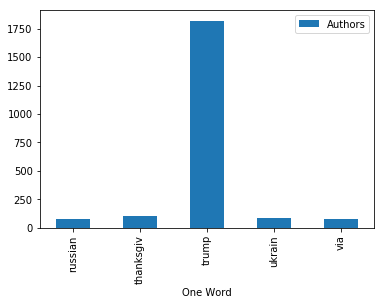

In [155]:
dominant_words = cleaned_data[['Authors', 'One Word']].groupby('One Word').count()
dominant_words.plot.bar()
# a bar blot representing the number of authors per most important word in related topic